## import

In [16]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch

sys.path.append("../Lib")
from model import DoubleWell
from flow import BG_RealNVP
from mcmc import  MetropolisGauss

In [3]:
model=DoubleWell()

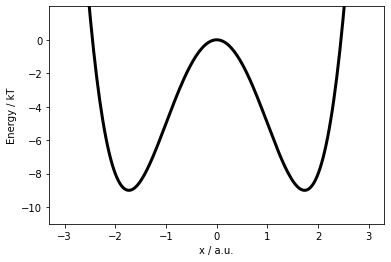

In [4]:
_=model.plot_dimer_energy()

In [5]:
nsteps = 500000
stride = 10
noise=0.05
burnin=100000
xl=np.array([-2,0])
xr=np.array([2,0])

In [6]:
sampler_l = MetropolisGauss(model, xl, noise=noise, burnin=burnin, stride=stride)
sampler_l.run(nsteps)

In [7]:
sampler_r = MetropolisGauss(model, xr, noise=noise, burnin=burnin, stride=stride)
sampler_r.run(nsteps)

In [8]:
xl=sampler_l.traj
xr=sampler_r.traj

In [9]:
x_brute=np.vstack((xl,xr))
x_brute.shape

(80000, 2)

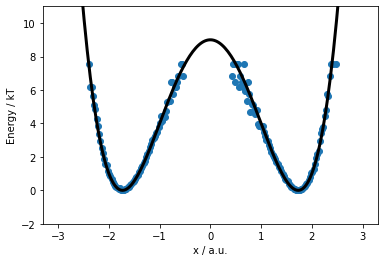

In [10]:
_=model.plot_sample_energy(x_brute)

Text(0.5, 1.0, '$X = g(z)$')

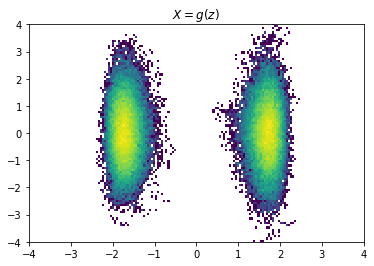

In [11]:
ax=plt.gca()
ax.hist2d(x_brute[:,0],x_brute[:,1],bins=100,norm=matplotlib.colors.LogNorm())
#plt.scatter(x[:, 0], x[:, 1], c='r') # x[:, 0, 0] is x1 coordinates of all samples 
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.title(r'$X = g(z)$')

## BG

#### ML

In [12]:
model_BG=BG_RealNVP(model,dim=model.dim)

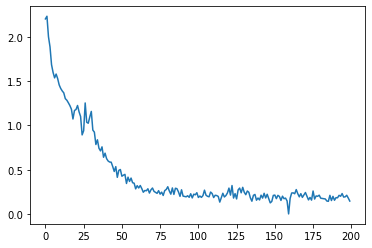

In [13]:
loss=model_BG.train_ML(x_brute,iter=200,lr=1e-3,batch_size=2048)
plt.plot(loss)

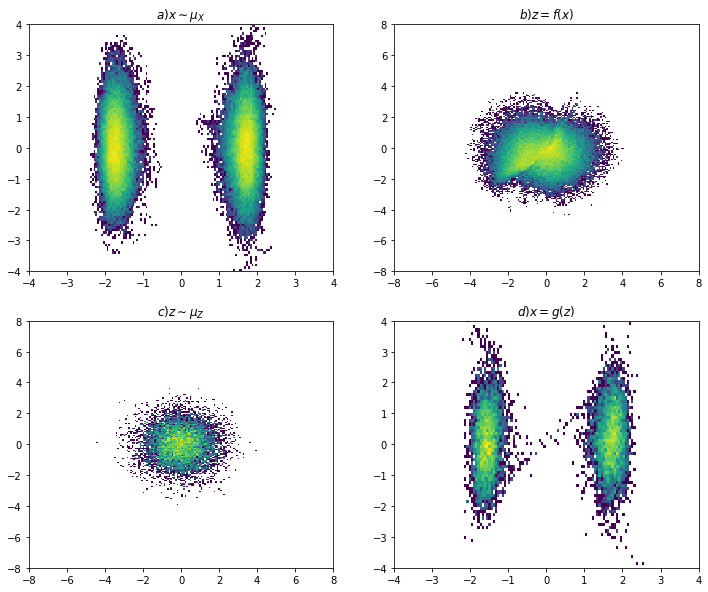

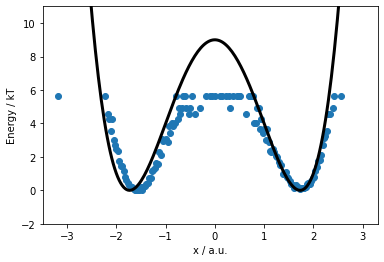

In [15]:
# Visualize
fig, axes = plt.subplots(2, 2, figsize = (12,10))

# plot data sampled in real space 
plt.subplot(221)
ax=plt.gca()
ax.hist2d(x_brute[:,0],x_brute[:,1],bins=100,norm=matplotlib.colors.LogNorm())
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.title(r'$a) x \sim \mu_X$')

# sample from x and transform to z 
zb=model_BG.backward_flow(torch.from_numpy(x_brute))[0].detach().numpy()
plt.subplot(222)
ax=plt.gca()
ax.hist2d(zb[:,0],zb[:,1],bins=100,norm=matplotlib.colors.LogNorm())
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.title(r'$b) z = f(x)$')

# sampling from gaussian and transform to x
z, x, _ = model_BG.sample(10000)

#plot gaussian
plt.subplot(223)
ax=plt.gca()
ax.hist2d(z[:,0],z[:,1],bins=100,norm=matplotlib.colors.LogNorm())
#plt.scatter(z[:, 0], z[:, 1])
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.title(r'$c) z \sim \mu_Z$')

# plot x transformed from gaussian
plt.subplot(224)
ax=plt.gca()
ax.hist2d(x[:,0],x[:,1],bins=100,norm=matplotlib.colors.LogNorm())
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.title(r'$d) x = g(z)$')

plt.show()

_=model.plot_sample_energy(x)

In [ ]:
loss=model_BG.train_mix(x_brute,iter=200,lr=1e-4,batch_size=2048)
plt.plot(loss)

In [ ]:
# Visualize
fig, axes = plt.subplots(2, 2, figsize = (12,10))

# plot data sampled in real space 
plt.subplot(221)
ax=plt.gca()
ax.hist2d(x_brute[:,0],x_brute[:,1],bins=100,norm=matplotlib.colors.LogNorm())
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.title(r'$a) x \sim \mu_X$')

# sample from x and transform to z 
zb=model_BG.backward_flow(torch.from_numpy(training_data))[0].detach().numpy()
plt.subplot(222)
ax=plt.gca()
ax.hist2d(zb[:,0],zb[:,1],bins=100,norm=matplotlib.colors.LogNorm())
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.title(r'$b) z = f(x)$')

# sampling from gaussian and transform to x
z, x, _ = model_BG.sample(10000)

#plot gaussian
plt.subplot(223)
ax=plt.gca()
ax.hist2d(z[:,0],z[:,1],bins=100,norm=matplotlib.colors.LogNorm())
#plt.scatter(z[:, 0], z[:, 1])
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.title(r'$c) z \sim \mu_Z$')

# plot x transformed from gaussian
plt.subplot(224)
ax=plt.gca()
ax.hist2d(x[:,0],x[:,1],bins=100,norm=matplotlib.colors.LogNorm())
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.title(r'$d) x = g(z)$')

plt.show()
_=model.plot_sample_energy(x)